In [144]:
import pandas as pd
import numpy as np

In [145]:
#DATA CLEANING -1)
Strikers_data = pd.read_excel('Strikers_performance.xlsx')
Strikers_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [146]:
#CHECKING FOR MISSING VALUES - 1.2) - isnull python method checks every value in the dataset to see if it is missing (i.e., NaN or null). 
#It creates a new table (of the same shape as data) with True where a value is missing and False otherwise. 
#This adds up the number of True values (i.e., the missing values) for each column in the dataset. 
#The result is a summary showing how many missing values are in each column.

missing_values = Strikers_data.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [147]:
# 1.3) - Importing SimpleImputer from sklearn to handle missing data - 
# SimpleImputer is used to fill missing values in a dataset
from sklearn.impute import SimpleImputer

In [148]:
# SimpleImputer Strategies:
# - 'mean': Replaces missing values with the mean of the column.
# - 'median': Replaces missing values with the median of the column.
# - 'most_frequent': Uses the most common value in the column.
# - 'constant': Fills with a specified constant value.
# -  Use strategy 'median' for numeric and 'most frequent' for nominal columns.

# Initialize SimpleImputer with 'median' strategy
#imputer = SimpleImputer(strategy='median')

# fit() for learn: Calculates the median of the 'Income' column (ignoring NaN)
#imputer.fit(data[['Income']])

# transform() for apply: Replaces missing values in 'Income' with the median
#data[['Income']] = imputer.transform(data[['Income']])

#Double brackets cuz Simple Imputer expects a dataframe and not series. Dataframe holds multiple columns, rows and variables.

In [149]:
# 1.4)- Calculates the median of the column (ignoring NaN) & Replaces missing values in with the median 

imputer = SimpleImputer(strategy='median')
imputer.fit(Strikers_data[['Movement off the Ball']])
Strikers_data[['Movement off the Ball']] = imputer.transform(Strikers_data[['Movement off the Ball']])

In [150]:
#Calculates the median of the column (ignoring NaN) & Replaces missing values in with the median

imputer = SimpleImputer(strategy='median')
imputer.fit(Strikers_data[['Big Game Performance']])
Strikers_data[['Big Game Performance']] = imputer.transform(Strikers_data[['Big Game Performance']])

In [151]:
#Calculates the median of the column (ignoring NaN) & Replaces missing values in with the median

imputer = SimpleImputer(strategy='median')
imputer.fit(Strikers_data[['Penalty Success Rate']])
Strikers_data[['Penalty Success Rate']] = imputer.transform(Strikers_data[['Penalty Success Rate']])

In [152]:
# 1.5)- RECHECKING FOR MISSING VALUES - 
missing_values = Strikers_data.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [153]:
#Attribute that gives you the data type of each column in a DataFrame or Series.
Strikers_data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [154]:
#DESCRIPTIVE ANALYSIS - 2)
#Method to calculate Descriptive statistics - 2.1)

round(Strikers_data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,15.04,8.10,25.76,0.60,0.20,0.70,69.79,59.81,19.53,39.95,6.93,0.74,0.80,7.01,8.06
std,144.48,4.90,2.93,7.07,0.10,0.05,0.10,10.34,10.17,4.96,9.92,1.94,0.10,0.10,2.10,2.07
min,1.00,0.00,0.00,4.73,0.31,0.05,0.40,40.71,35.07,4.96,8.23,2.23,0.46,0.53,0.56,0.62
25%,125.75,11.50,6.21,20.78,0.54,0.17,0.64,62.70,52.43,16.40,33.46,5.69,0.68,0.72,5.66,6.62
50%,250.50,15.06,8.09,25.84,0.60,0.20,0.70,69.62,60.08,19.74,39.98,6.91,0.75,0.80,6.99,8.02
75%,375.25,18.18,9.95,30.28,0.67,0.23,0.76,76.93,66.03,22.86,46.69,8.13,0.81,0.87,8.43,9.45
max,500.00,34.26,15.90,43.21,0.92,0.36,1.00,98.68,92.43,34.07,71.13,12.87,1.00,1.00,13.24,13.73


In [155]:
#DATA ANALYSIS & VISUALIZATION - 3)

# Importing the pyplot module from matplotlib as plt for plotting graphs
import matplotlib.pyplot as plt 

# Importing the seaborn library as sns for advanced statistical plotting
import seaborn as sns

In [156]:
# Get the frequency count of unique values in the 'Footedness' column - 3.1)
#value_counts is a method in pandas that is used to get the frequency count 
#of unique values in a Series (which is a single column of data in a DataFrame).
frequecy_Footedness = Strikers_data['Footedness'].value_counts()

# Display the frequency count of 'Footedness' column
frequecy_Footedness

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

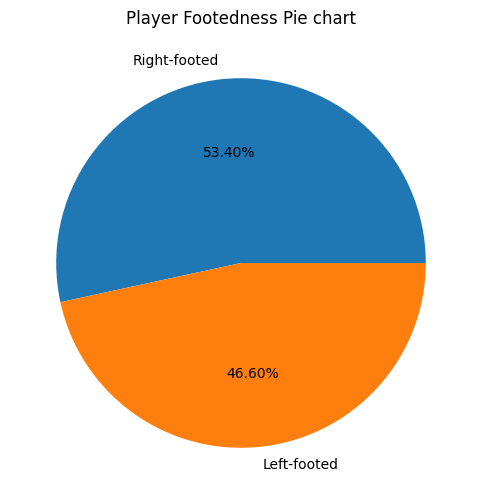

In [157]:
#VISUALIZING THE FREQUENCY IN A PIE CHART - 3.2)

plt.figure(figsize=(10,6))
frequecy_Footedness.plot(kind='pie',autopct='%1.2f%%')
plt.title('Player Footedness Pie chart')
plt.ylabel('')
plt.show()

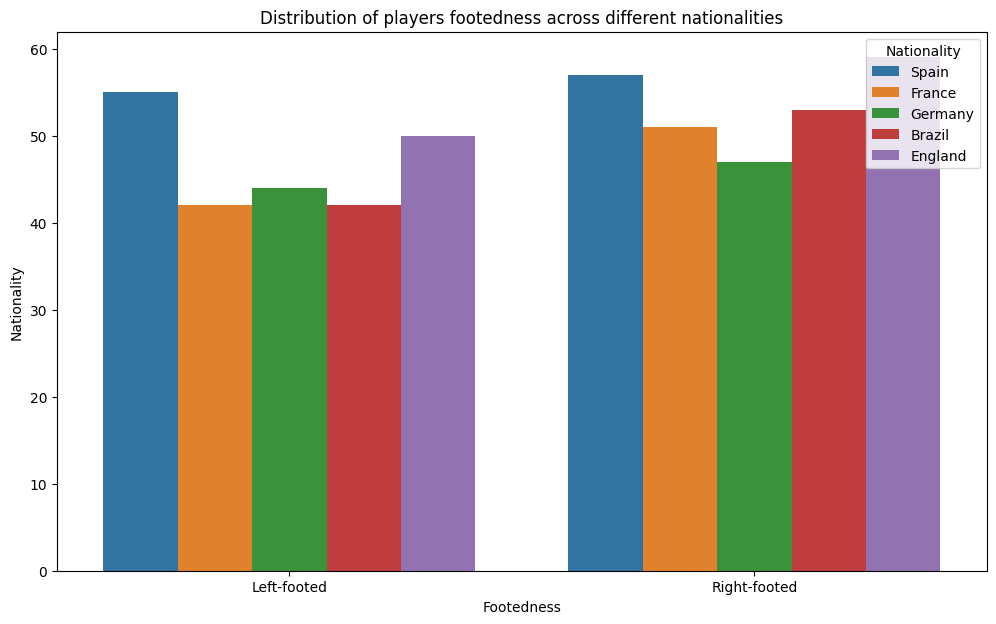

In [158]:
# 3.3 - Visualize the distribution of players' footedness across different nationalities in a countplot of seaborn.

# Visualize the distribution of players' footedness across different nationalities
plt.show()
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Footedness', hue = 'Nationality', data = Strikers_data)
plt.title('Distribution of players footedness across different nationalities')
plt.xlabel('Footedness')
plt.ylabel('Nationality')
plt.show()

In [159]:
#STATISTICAL ANALYSIS - 4) TO find the nationality strikers have the highest average number of goals scored. 

avg_goals_by_nationality = Strikers_data.groupby('Nationality')['Goals Scored'].mean()
avg_goals_by_nationality

Nationality
Brazil     15.804927
England    14.465756
France     14.900827
Germany    14.860242
Spain      15.196491
Name: Goals Scored, dtype: float64

In [160]:
# 4.1) -Calculate the average conversion rate for players based on their footedness.

average_cr_by_footedness = Strikers_data.groupby('Footedness')['Conversion Rate'].mean()
average_cr_by_footedness

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

In [161]:
# 4.2) significant difference in consistency rates among strikers from various nationalities

from scipy import stats
from scipy.stats import shapiro
import numpy as np

# Assuming Strikers_data is a DataFrame and 'Consistency' is one of its columns
numeric_column = ['Consistency']
shapiro_results = {}

# Iterate through the list of numeric columns (in this case, just 'Consistency')
for column in numeric_column:
    # Perform the Shapiro-Wilk test for normality
    stat, p_value = shapiro(Strikers_data[column])
    
    # Store the rounded p-value in the results dictionary
    shapiro_results[column] = round(p_value, 3)

# Print the results dictionary
print(shapiro_results)

{'Consistency': np.float64(0.451)}


In [162]:
# 4.3) #ONE WAY ANOVA TEST: To check if there is significant difference in consistency rates among strikers from various nationalities.
#Then perform TESt for heteroscedasticity (LEVENE TEST for Nationality) 

from scipy.stats import levene

# Assume these are your consistency rates for each nationality group
spain = Strikers_data.query('Nationality == "Spain"')['Consistency']
france = Strikers_data.query('Nationality == "France"')['Consistency']
germany = Strikers_data.query('Nationality == "Germany"')['Consistency']
brazil = Strikers_data.query('Nationality == "Brazil"')['Consistency']
england = Strikers_data.query('Nationality == "England"')['Consistency']

Test_stat, p_value = stats.f_oneway(spain, france, germany, brazil, england)
print(f"ANOVA Test Statistic: {stat}")
print(f"ANOVA p-value: {p_value}")

if p_value < 0.05:
    print('YES, There is a significant difference in consistency rates among strikers from various nationalities.')
else:
    print('There is NO significant difference in consistency rates among strikers from various nationalities')

ANOVA Test Statistic: 0.9968719443391263
ANOVA p-value: 0.19278675901599154
There is NO significant difference in consistency rates among strikers from various nationalities


In [163]:
# 4.4) - Perform Levene's test for homogeneity of variances.
stat, p_value = levene(spain, france, germany, brazil, england)

print(f"Levene's Test: Statistic ={stat: }, p-value ={p_value: }")

Levene's Test: Statistic = 0.4003865098407206, p-value = 0.8083990350934653


In [164]:
# 4.5) - Normality/Assumption: Shapiro for Hold Up Play 

stat, p_value = shapiro(Strikers_data['Hold-up Play'])

print("P Value:", p_value)

P Value: 0.32468363296810476


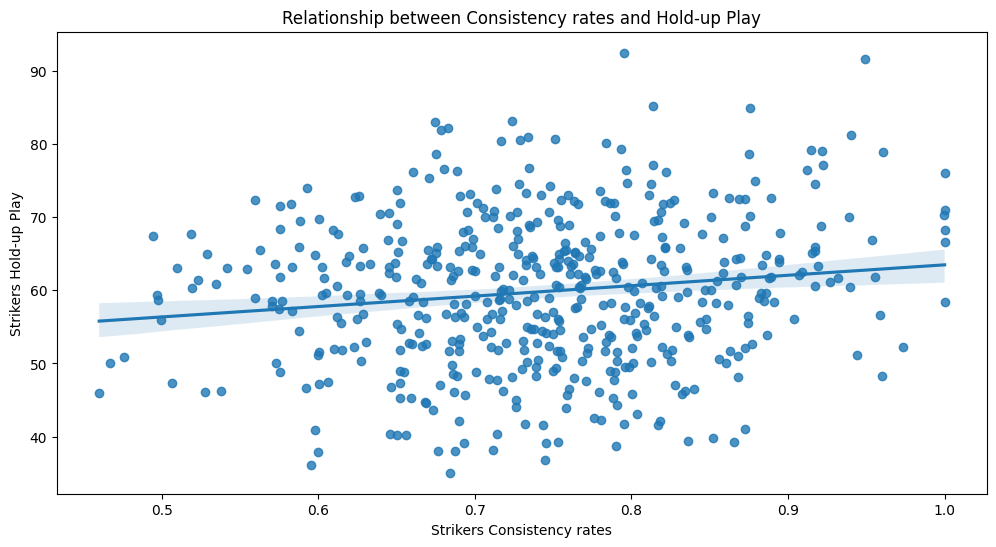

In [165]:
# 4.6) - Normality/Assumption: Linearity for both variables

plt.figure(figsize = (12, 6))
# Create a regression plot to visualize the relationship between 'Consistency' and 'Hold-up Play'
sns.regplot(x = 'Consistency', y = 'Hold-up Play', data = Strikers_data)
plt.title('Relationship between Consistency rates and Hold-up Play')
plt.xlabel('Strikers Consistency rates')
plt.ylabel('Strikers Hold-up Play')
plt.show()

In [166]:
# 4.6) Correlation - To check if there is significant correlation between strikers' Hold-up play and consistency rate.

from scipy.stats import pearsonr
Consistency_rate = Strikers_data['Consistency']
Striker_Hold_up_Play = Strikers_data['Hold-up Play']
# Calculate the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(Consistency_rate, Striker_Hold_up_Play)

print("P Value: ", p_value)

if p_value < 0.05:
    print('YES, strikers hold-up play significantly influences their consistency rate.')
else:
    print('strikers hold-up play DOES NOT significantly influence their consistency rate.')

print("Pearson Correlation Coefficient: ", corr)

P Value:  0.0011443972418055694
YES, strikers hold-up play significantly influences their consistency rate.
Pearson Correlation Coefficient:  0.14504436542869956


In [167]:
# 4.7 - REGRESSION ANALYSIS BETWEEN Hold-up Play & Consistency
import statsmodels.api as sm

x = Strikers_data['Hold-up Play']  # Use straight quotes
y = Strikers_data['Consistency']
x_and_constant = sm.add_constant(x)
model = sm.OLS(y, x_and_constant).fit()  # Fit the Ordinary Least Squares model
print(model.summary())  # Print the summary of the regression model

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.70
Date:                Thu, 05 Dec 2024   Prob (F-statistic):            0.00114
Time:                        15:58:01   Log-Likelihood:                 429.86
No. Observations:                 500   AIC:                            -855.7
Df Residuals:                     498   BIC:                            -847.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6552      0.027     23.903   

In [168]:
# FEATURE ENGINEERING - 5)
#Calculate the Total Contribution Score by summing up specific columns - 

Strikers_data['Total_Contribution_Score'] = (
    Strikers_data['Goals Scored'] +
    Strikers_data['Assists'] +
    Strikers_data['Shots on Target'] +
    Strikers_data['Dribbling Success'] +
    Strikers_data['Aerial Duels Won'] +
    Strikers_data['Defensive Contribution'] +
    Strikers_data['Big Game Performance'] +
    Strikers_data['Consistency'])
Strikers_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_Contribution_Score
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,116.882195
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,113.521571
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,96.556476
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,126.859035
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,110.548681


In [169]:
# 5.1) Label Encoder - Encode the Footedness and marital status by LabelEncoder.

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode 'Footedness'
Strikers_data['Footedness_Encoded'] = encoder.fit_transform(Strikers_data['Footedness'])

# View the updated DataFrame
Strikers_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_Contribution_Score,Footedness_Encoded
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,...,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,116.882195,0
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,...,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,113.521571,0
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,...,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,96.556476,0
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,...,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,126.859035,1
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,...,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,110.548681,0


In [170]:
# 5.2) Encode 'Marital Status' Encode the Footedness and marital status by LabelEncoder.
Strikers_data['Marital_Status_Encoded'] = encoder.fit_transform(Strikers_data['Marital Status'])

Strikers_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_Contribution_Score,Footedness_Encoded,Marital_Status_Encoded
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,...,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,116.882195,0,0
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,...,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,113.521571,0,1
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,...,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,96.556476,0,0
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,...,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,126.859035,1,0
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,...,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,110.548681,0,1


In [171]:
# 5.3)- CREATE DUMMY variables for Nationality and add them to the data

dummies = pd.get_dummies(Strikers_data[['Nationality']], dtype=int)
Strikers_data = pd.concat([Strikers_data, dummies], axis = 1)

Strikers_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Impact on Team Performance,Off-field Conduct,Total_Contribution_Score,Footedness_Encoded,Marital_Status_Encoded,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,...,8.570370,11.451388,116.882195,0,0,0,0,0,0,1
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,...,3.444638,8.243689,113.521571,0,1,0,0,1,0,0
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,...,8.429491,9.506835,96.556476,0,0,0,0,0,1,0
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,...,6.532552,8.199653,126.859035,1,0,0,0,1,0,0
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,...,8.414915,6.665333,110.548681,0,1,0,0,1,0,0


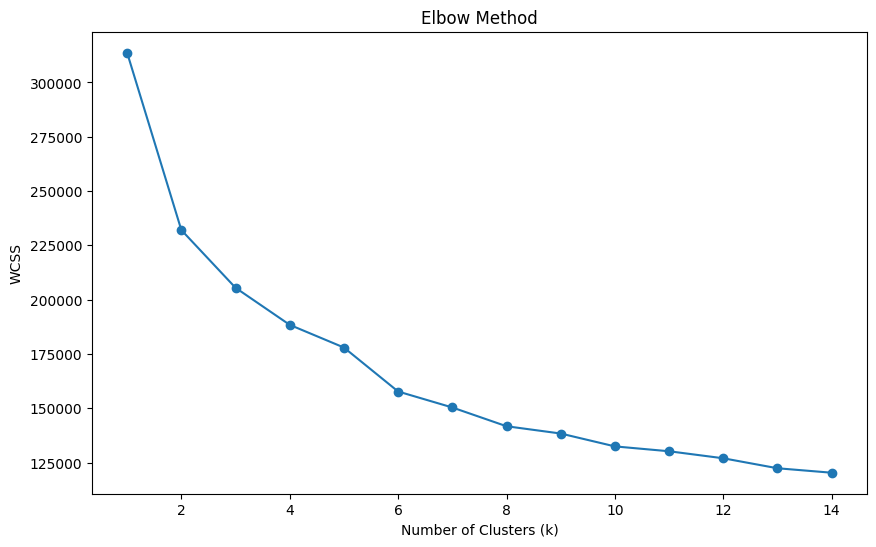

   Striker_ID Nationality    Footedness Marital Status  Goals Scored  \
0           1       Spain   Left-footed             No     17.483571   
1           2      France   Left-footed            Yes     14.308678   
2           3     Germany   Left-footed             No     18.238443   
3           4      France  Right-footed             No     22.615149   
4           5      France   Left-footed            Yes     13.829233   

     Assists  Shots on Target  Shot Accuracy  Conversion Rate  \
0  10.778533        34.795488       0.677836         0.166241   
1  13.728250        31.472436       0.544881         0.192774   
2   3.804297        25.417413       0.518180         0.160379   
3   9.688908        20.471443       0.599663         0.184602   
4   6.048072        29.887563       0.582982         0.105319   

   Dribbling Success  ...  Off-field Conduct  Total_Contribution_Score  \
0           0.757061  ...          11.451388                116.882195   
1           0.796818  ...   

In [172]:
# CLUSTERING ANALYSIS - 6)

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 6.1)- Drop unwanted columns ('Striker_ID', 'Nationality', 'Marital Status', 'Footedness')
x = Strikers_data.drop(columns=['Striker_ID', 'Nationality', 'Marital Status', 'Footedness'])

# 6.2)- Calculate the Within-Cluster-Sum-of-Squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# 6.3)- Visualize the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

#  6.4)- Build the KMeans model with the optimal number of clusters (e.g., k=2 based on the elbow chart)
final_km = KMeans(n_clusters=2, init='k-means++', random_state=42)
final_km.fit(x)

# Add cluster labels to the original DataFrame
Strikers_data['Cluster_Labels'] = final_km.labels_

# View the first few rows of the updated DataFrame
print(Strikers_data.head())

In [174]:
# 6.3.1) - Drop the specified columns from the DataFrame
Strikers_data = Strikers_data.drop(columns=['Striker_ID', 'Nationality', 'Marital Status', 'Footedness'])
Strikers_data.head() 

,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,...,Off-field Conduct,Total_Contribution_Score,Footedness_Encoded,Marital_Status_Encoded,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Cluster_Labels
0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,...,11.451388,116.882195,0,0,0,0,0,0,1,0
1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,...,8.243689,113.521571,0,1,0,0,1,0,0,0
2,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,...,9.506835,96.556476,0,0,0,0,0,1,0,0
3,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,...,8.199653,126.859035,1,0,0,0,1,0,0,1
4,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,...,6.665333,110.548681,0,1,0,0,1,0,0,0


In [175]:
#6.4)- Calculate the average total contribution score by the value of clusters.

Average_Total_Contribution_Score = round(Strikers_data.groupby('Cluster_Labels')[['Total_Contribution_Score']].mean(), 2)
print(Average_Total_Contribution_Score)

                Total_Contribution_Score
Cluster_Labels                          
0                                 104.96
1                                 126.56


In [176]:
#6.5)- Map cluster values to 'Best strikers' and 'Regular strikers'

striker_mapping = {0: 'Best strikers', 1: 'Regular strikers'}
Strikers_data['Strikers types'] = Strikers_data['Cluster_Labels'].map(striker_mapping)

# Drop the Clusters variable
Strikers_data = Strikers_data.drop(columns=['Cluster_Labels'])

# Display the updated DataFrame
print(Strikers_data.head())

   Goals Scored    Assists  Shots on Target  Shot Accuracy  Conversion Rate  \
0     17.483571  10.778533        34.795488       0.677836         0.166241   
1     14.308678  13.728250        31.472436       0.544881         0.192774   
2     18.238443   3.804297        25.417413       0.518180         0.160379   
3     22.615149   9.688908        20.471443       0.599663         0.184602   
4     13.829233   6.048072        29.887563       0.582982         0.105319   

   Dribbling Success  Movement off the Ball  Hold-up Play  Aerial Duels Won  \
0           0.757061              50.921924     71.806409         15.682532   
1           0.796818              61.396150     53.726866         19.843983   
2           0.666869              65.863945     60.452227         20.090084   
3           0.638776              88.876877     60.511979         22.363152   
4           0.591485              75.565531     54.982158         13.165708   

   Defensive Contribution  ...  Off-field Conduct 

In [177]:
#6.6)- Feature mapping for 'Strikers types' 
#feature mapping to map the new feature Strikers types: 'Best strikers' for 1 and 'Regular strikers' for 0.

striker_type_mapping = {'Best strikers': 1, 'Regular strikers': 0}
Strikers_data['Strikers types'] = Strikers_data['Strikers types'].map(striker_type_mapping)

# Display the updated DataFrame
print(Strikers_data.head())

   Goals Scored    Assists  Shots on Target  Shot Accuracy  Conversion Rate  \
0     17.483571  10.778533        34.795488       0.677836         0.166241   
1     14.308678  13.728250        31.472436       0.544881         0.192774   
2     18.238443   3.804297        25.417413       0.518180         0.160379   
3     22.615149   9.688908        20.471443       0.599663         0.184602   
4     13.829233   6.048072        29.887563       0.582982         0.105319   

   Dribbling Success  Movement off the Ball  Hold-up Play  Aerial Duels Won  \
0           0.757061              50.921924     71.806409         15.682532   
1           0.796818              61.396150     53.726866         19.843983   
2           0.666869              65.863945     60.452227         20.090084   
3           0.638776              88.876877     60.511979         22.363152   
4           0.591485              75.565531     54.982158         13.165708   

   Defensive Contribution  ...  Off-field Conduct 

In [178]:
Strikers_data.columns

Index(['Goals Scored', 'Assists', 'Shots on Target', 'Shot Accuracy',
       'Conversion Rate', 'Dribbling Success', 'Movement off the Ball',
       'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
       'Big Game Performance', 'Consistency', 'Penalty Success Rate',
       'Impact on Team Performance', 'Off-field Conduct',
       'Total_Contribution_Score', 'Footedness_Encoded',
       'Marital_Status_Encoded', 'Nationality_Brazil', 'Nationality_England',
       'Nationality_France', 'Nationality_Germany', 'Nationality_Spain',
       'Strikers types'],
      dtype='object')

In [179]:
# MACHINE LEARNING MODEL - 7)

# Drop unnecessary columns and select features for x and target for y
x_class = Strikers_data.drop(['Strikers types'], axis=1)
y_class = Strikers_data['Strikers types']

# Display the shapes of x and y to verify
print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)

Features (x) shape: (500, 23)
Target (y) shape: (500,)


In [180]:
# 7.2) - Perform feature scaling with StandardScaler and split the data into train and test sets where the test data size will be 20%.

from sklearn.preprocessing import MinMaxScaler

scaler_2 = MinMaxScaler()
scaled_x_class = (scaler_2.fit_transform(x_class)).round()

In [181]:
scaled_x_class

array([[1., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [182]:
#7.3) - plit the data into train and test sets where the test data size will be 20%.

from sklearn.model_selection import train_test_split
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(scaled_x_class, y_class, 
                                                                   test_size = 0.2, random_state = 42)

In [183]:
x_class_train.shape

(400, 23)

In [184]:
# 7.4) - Build a logistic regression machine learning model to predict strikers type.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lgr_model = LogisticRegression()
lgr_model.fit(x_class_train, y_class_train)

y_lgr_pred = lgr_model.predict(x_class_test)

# 7.5)- Make predictions and evaluate by calculating the accuracy percentage.

accuracy_lgr = accuracy_score(y_class_test, y_lgr_pred)
print(accuracy_lgr*100,'%')

95.0 %


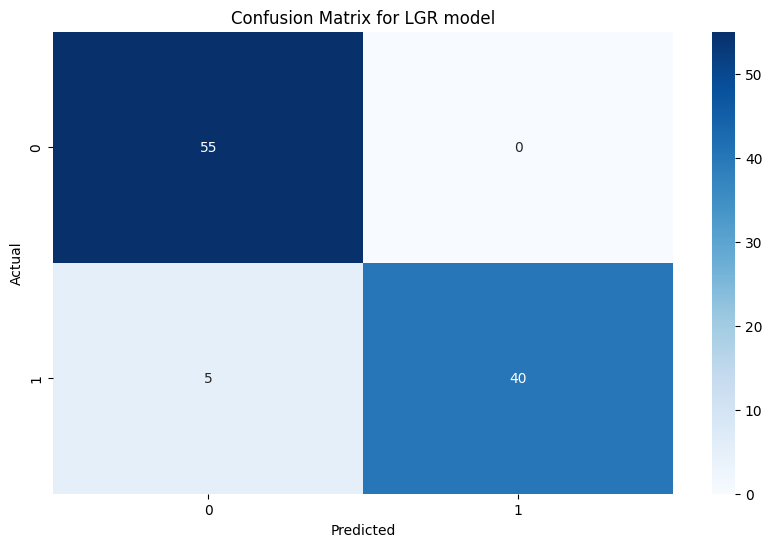

In [185]:
# 7.6) - Create the confusion matrix and visualize it.

conf_matrix_lgr = confusion_matrix(y_class_test, y_lgr_pred)

plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for LGR model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [186]:
y_class

0      1
1      1
2      1
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    1
Name: Strikers types, Length: 500, dtype: int64

In [187]:
# Check the distribution of classes in the training set
print(y_class_train.value_counts())
# Check the distribution of classes in the test set
print(y_class_test.value_counts())

Strikers types
0    218
1    182
Name: count, dtype: int64
Strikers types
0    55
1    45
Name: count, dtype: int64


In [188]:
from sklearn.metrics import classification_report

print(classification_report(y_class_test, y_lgr_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        55
           1       1.00      0.89      0.94        45

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [192]:
Strikers_data.head()

,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,...,Off-field Conduct,Total_Contribution_Score,Footedness_Encoded,Marital_Status_Encoded,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,...,11.451388,116.882195,0,0,0,0,0,0,1,1
1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,...,8.243689,113.521571,0,1,0,0,1,0,0,1
2,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,...,9.506835,96.556476,0,0,0,0,0,1,0,1
3,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,...,8.199653,126.859035,1,0,0,0,1,0,0,0
4,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,...,6.665333,110.548681,0,1,0,0,1,0,0,1


In [193]:
# Filter for left-footed players and from France
left_footed_france = Strikers_data[(Strikers_data['Footedness_Encoded'] == 0) & (Strikers_data['Nationality_France'] == 1)]

# Count the number of left-footed players from France
num_left_footed_france = len(left_footed_france)

# Display the result
print(f"Number of left-footed players from France: {num_left_footed_france}")


Number of left-footed players from France: 42
